In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df= pd.read_csv('/content/drive/MyDrive/Suraj_eda/trf_merged.csv')



In [ ]:
df

,Local Date,Local Time,Day Type ID,Total Carriageway Flow,Total Flow vehicles less than 5.2m,Total Flow vehicles 5.21m - 6.6m,Total Flow vehicles 6.61m - 11.6m,Total Flow vehicles above 11.6m,Speed Value,Quality Index,Network Link Id,NTIS Model Version
0,01/10/2023,00:14:00,5,8.0,7.0,1.0,0.0,0.0,91.93,15,120010101,19
1,01/10/2023,00:29:00,5,11.0,8.0,2.0,0.0,1.0,84.76,15,120010101,19
2,01/10/2023,00:44:00,5,17.0,10.0,2.0,0.0,5.0,87.20,15,120010101,19
3,01/10/2023,00:59:00,5,10.0,6.0,0.0,2.0,2.0,92.63,15,120010101,19
4,01/10/2023,01:14:00,6,7.0,7.0,0.0,0.0,0.0,97.77,15,120010101,19
...,...,...,...,...,...,...,...,...,...,...,...,...
8831,2023-12-31,22:59:00,6,13.0,13.0,0.0,0.0,0.0,92.91,15,120010101,19
8832,2023-12-31,23:14:00,6,11.0,10.0,0.0,1.0,0.0,90.91,15,120010101,19
8833,2023-12-31,23:29:00,6,14.0,11.0,1.0,1.0,1.0,81.69,15,120010101,19
8834,2023-12-31,23:44:00,6,5.0,5.0,0.0,0.0,0.0,93.37,15,120010101,19


In [ ]:
# Step 1: Preprocess the Data
def preprocess_data(df):
    # Combine 'Local Date' and 'Local Time' into a single 'datetime' column
    df['datetime'] = pd.to_datetime(df['Local Date'] + ' ' + df['Local Time'], format='%d/%m/%Y %H:%M:%S')

    # Set 'datetime' as the index
    df.set_index('datetime', inplace=True)

    # Drop original date and time columns
    df.drop(columns=['Local Date', 'Local Time'], inplace=True)

    return df

# Apply preprocessing
df = preprocess_data(df)

# Step 2: Perform Exploratory Data Analysis (EDA)
# Check the first few rows of the DataFrame
print(df.head())

# Step 3: Visualize the Data
# Example: Total Carriageway Flow over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Carriageway Flow'], label='Total Carriageway Flow', marker='o')
plt.title('Total Carriageway Flow Over Time')
plt.xlabel('Datetime')
plt.ylabel('Flow')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Using Plotly for interactive visualization
fig = px.line(df, x=df.index, y='Total Carriageway Flow', title='Total Carriageway Flow Over Time')
fig.show()

# Example: Compare Total Flows of Different Vehicle Types
fig = px.line(df, x=df.index,
              y=['Total Flow vehicles less than 5.2m',
                 'Total Flow vehicles 5.21m - 6.6m',
                 'Total Flow vehicles 6.61m - 11.6m',
                 'Total Flow vehicles above 11.6m'],
              title='Comparison of Vehicle Flows Over Time')
fig.show()

# Step 4: Save the processed DataFrame (if needed)
df.to_csv('processed_traffic_data.csv')

ValueError: time data "2023-11-01 00:14:00" doesn't match format "%d/%m/%Y %H:%M:%S", at position 2980. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

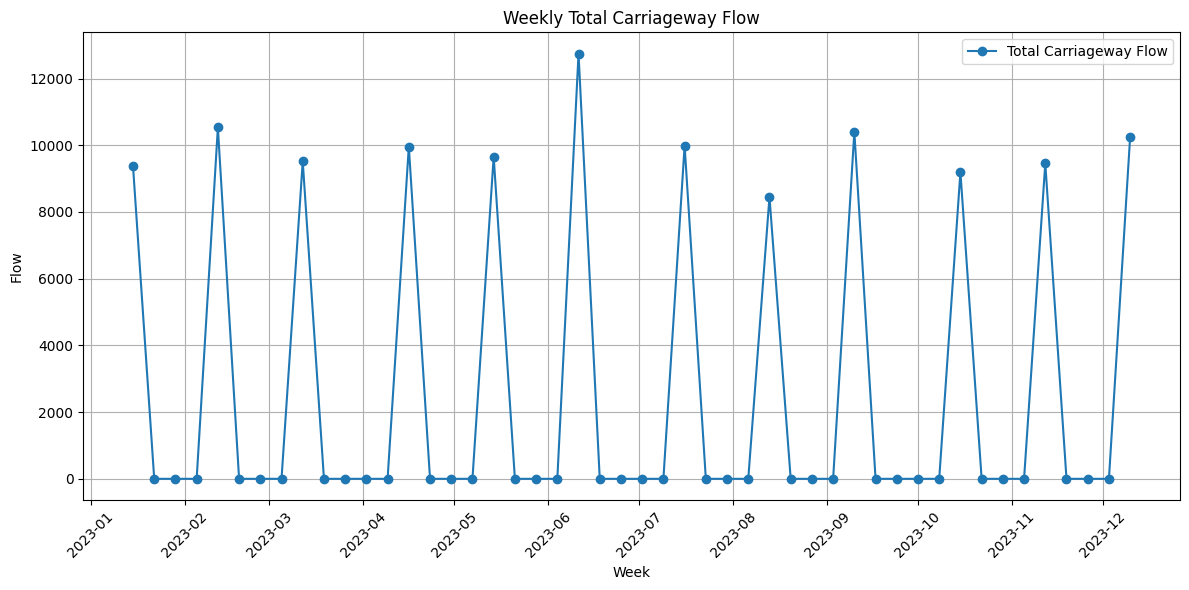

<ipython-input-35-945a5baff3a9>:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



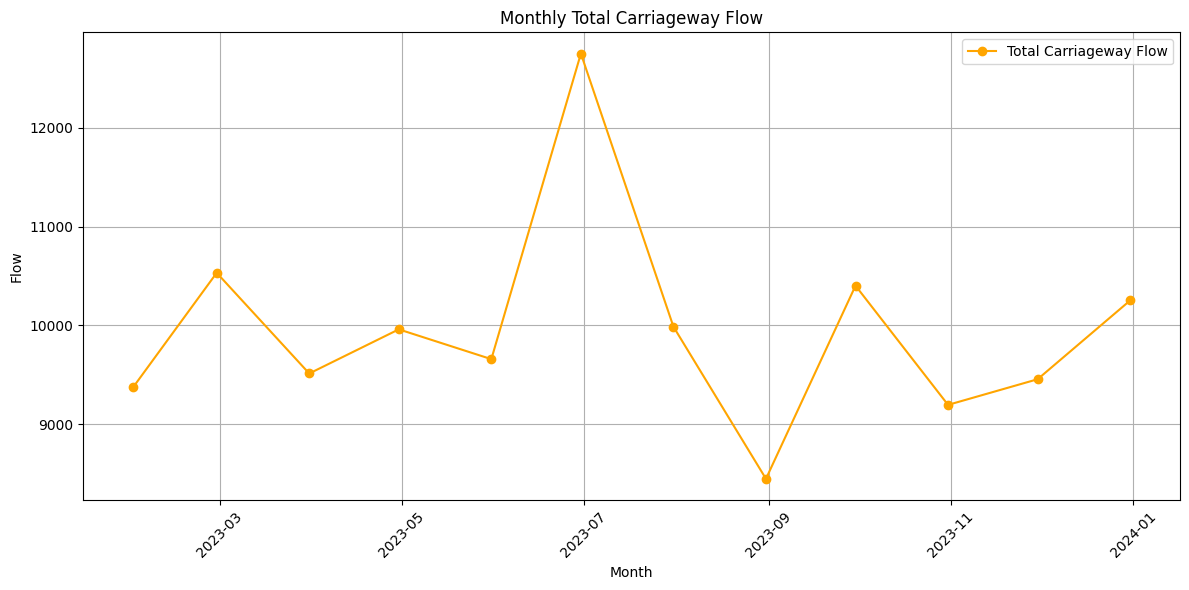

In [ ]:

# Step 2: Perform Weekly Analysis
# Resample the data on a weekly basis and sum the flows
weekly_analysis = df.resample('W').sum()

# Plotting the weekly analysis
plt.figure(figsize=(12, 6))
plt.plot(weekly_analysis.index, weekly_analysis['Total Carriageway Flow'], label='Total Carriageway Flow', marker='o')
plt.title('Weekly Total Carriageway Flow')
plt.xlabel('Week')
plt.ylabel('Flow')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 3: Perform Monthly Analysis
# Resample the data on a monthly basis and sum the flows
monthly_analysis = df.resample('M').sum()

# Plotting the monthly analysis
plt.figure(figsize=(12, 6))
plt.plot(monthly_analysis.index, monthly_analysis['Total Carriageway Flow'], label='Total Carriageway Flow', marker='o', color='orange')
plt.title('Monthly Total Carriageway Flow')
plt.xlabel('Month')
plt.ylabel('Flow')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Using Plotly for interactive monthly visualization
fig = px.line(monthly_analysis, x=monthly_analysis.index, y='Total Carriageway Flow', title='Monthly Total Carriageway Flow')
fig.show()

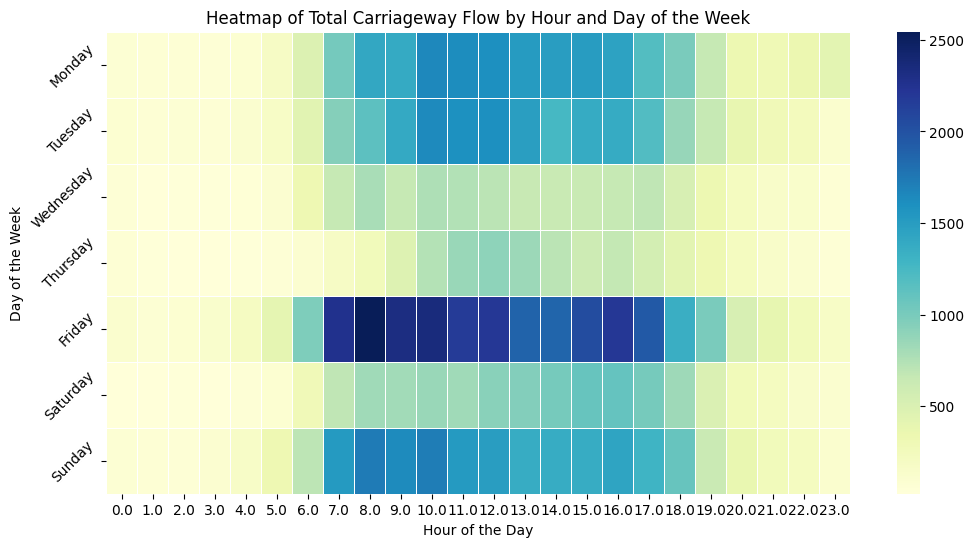

In [ ]:
# Step 2: Prepare data for heatmap
# Extract hour and day of the week for heatmap
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()

# Create a pivot table
heatmap_data = df.pivot_table(values='Total Carriageway Flow',
                               index='day_of_week',
                               columns='hour',
                               aggfunc='sum',
                               fill_value=0)

# Reorder the days for correct plotting order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Step 3: Plot the heatmap without values
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Heatmap of Total Carriageway Flow by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.show()